In [25]:
# Import dependecies 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from string import ascii_letters


In [9]:
# Read first dataset and preview
df = pd.read_csv("merged_datasets/dataset_for_correlation.csv")
df.head()

,Year,State,Male_High_school_graduate_(includes_equivalency),Male_Bachelor_degree,Male_Graduate_or_professional_degree,Male_18-24_Less_than_9th_grade,"Male_18-24_9th_to_12th_grade,_no_diploma",Male_18-24_High_school_graduate_(includes_equivalency),"Male_18-24_Some_college,_no_degree",Male_18-24_Associate_degree,...,"Female_65_and_older_9th_to_12th_grade,_no_diploma",Female_65_and_older_High_school_graduate_(includes_equivalency),"Female_65_and_older_Some_college,_no_degree",Female_65_and_older_Associate_degree,Female_65_and_older_Bachelor_degree,Female_65_and_older_Graduate_or_professional_degree,Household_mean_income_(dollars),Families_mean_income_(dollars),Married-couple-families_mean_income_(dollars),Nonfamily_households_mean_income_(dollars)
0,2018,Alabama,603703,264142,141603,3553,30855,92087,78026,14302,...,51183,175611,92559,26900,50522,39794,69091,82884,98221,40905
1,2018,Alaska,95887,43681,27730,358,4159,18021,12595,992,...,2574,11283,10520,3282,7513,6352,96080,109619,122489,63577
2,2018,Arizona,708440,463148,269575,7116,53104,125103,130173,14414,...,46095,189308,176447,52809,96949,74326,80477,92154,105812,53887
3,2018,Arkansas,414645,141664,83126,2060,16870,61540,53055,7056,...,31059,112050,55201,13098,29934,21894,66766,79300,93381,38852
4,2018,California,3483509,2896574,1737855,25665,202335,643676,788192,88991,...,216747,707112,650633,250693,529712,346719,107384,119820,139165,73834


In [72]:
# Subset for 2018
df_2018 = df[(df["Year"] == 2018)]
df_2018

,Year,State,Male_High_school_graduate_(includes_equivalency),Male_Bachelor_degree,Male_Graduate_or_professional_degree,Male_18-24_Less_than_9th_grade,"Male_18-24_9th_to_12th_grade,_no_diploma",Male_18-24_High_school_graduate_(includes_equivalency),"Male_18-24_Some_college,_no_degree",Male_18-24_Associate_degree,...,"Female_65_and_older_9th_to_12th_grade,_no_diploma",Female_65_and_older_High_school_graduate_(includes_equivalency),"Female_65_and_older_Some_college,_no_degree",Female_65_and_older_Associate_degree,Female_65_and_older_Bachelor_degree,Female_65_and_older_Graduate_or_professional_degree,Household_mean_income_(dollars),Families_mean_income_(dollars),Married-couple-families_mean_income_(dollars),Nonfamily_households_mean_income_(dollars)
0,2018,Alabama,603703,264142,141603,3553,30855,92087,78026,14302,...,51183,175611,92559,26900,50522,39794,69091,82884,98221,40905
1,2018,Alaska,95887,43681,27730,358,4159,18021,12595,992,...,2574,11283,10520,3282,7513,6352,96080,109619,122489,63577
2,2018,Arizona,708440,463148,269575,7116,53104,125103,130173,14414,...,46095,189308,176447,52809,96949,74326,80477,92154,105812,53887
3,2018,Arkansas,414645,141664,83126,2060,16870,61540,53055,7056,...,31059,112050,55201,13098,29934,21894,66766,79300,93381,38852
4,2018,California,3483509,2896574,1737855,25665,202335,643676,788192,88991,...,216747,707112,650633,250693,529712,346719,107384,119820,139165,73834


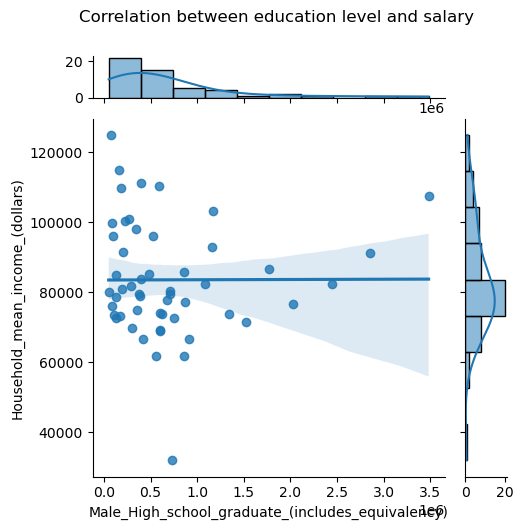

In [71]:
# Create a joint plot for entry level positions in the US
joint_plot_2018 = sns.jointplot(x = "Male_High_school_graduate_(includes_equivalency)", y = "Household_mean_income_(dollars)", data = df_2018, kind = "reg", height = 5, ratio = 6, marginal_ticks=True, space = 0.5)
plt.suptitle("Correlation between education level and salary", y = 1.05)
joint_plot_2018.savefig("jointplot_2018.png", dpi = 400) 